# **Inferential Statistics**

## **Binomial Distributions**

### **Que: What is the probability that a table of four will leave a tip of `20%` or more on their bill at this restaurant?**

To answer this question, we can use the `binomial theorem`, which allows us to calculate the probability of a certain number of successes in a fixed number of trials. In this case, the `success` is leaving a tip of `20%` or more, and the `trial` is a table of four.

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [15]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


- Next, we need to calculate the proportion of tables that leave a tip of `10%` or more.

- We can do this by creating a new column in the dataframe that indicates whether the tip percentage is 20% or greater, and then taking the mean of that column:

In [16]:
# Creating the New Column
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_10plus'] = np.where(tips['tip_pct'] >= 0.1, 1, 0)

# Displaying the dataSet
display(tips)

# calculating the mean
prop_10plus = tips['tip_10plus'].mean()
print(f"Mean: {prop_20plus}")

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_10plus
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,0


Mean: 0.889344262295082


Now we can use the binomial theorem to calculate the probability of a table of four leaving a tip of 20% or more.

- We know that there are `4` people at the table, and the probability of a single person leaving a tip of 20% or more is prop_20plus.
- The probability of exactly `k` people at the table leaving a tip of `20%` or more can be calculated as follows:

In [17]:
n = 4
k = 4

# Calculating the Porbablity using the Binomial theorem
prob = np.math.comb(n, k) * (prop_10plus ** k) * ((1 - prop_10plus) ** (n - k))

The `np.math.comb(n, k)` function calculates the number of ways to choose `k` items from a set of `n` items, which in this case is the number of ways to choose `4` people from a table of `4`. The `(prop_20plus ** k) * ((1 - prop_20plus) ** (n - k))` term calculates the probability of getting exactly `k` successes in `n` trials.

Finally, we can print out the probability:

In [22]:
print(f'The probability of a table of four leaving a tip of 10% or more is: {"{:.2f}".format(prob*100)} percent')


The probability of a table of four leaving a tip of 10% or more is: 62.56 percent


Here's an example of how we can use `scipy.stats` to calculate the probability of a table of four leaving a certain number of tips of `10%` or more, and to plot the binomial distribution for this scenario:

`10%`

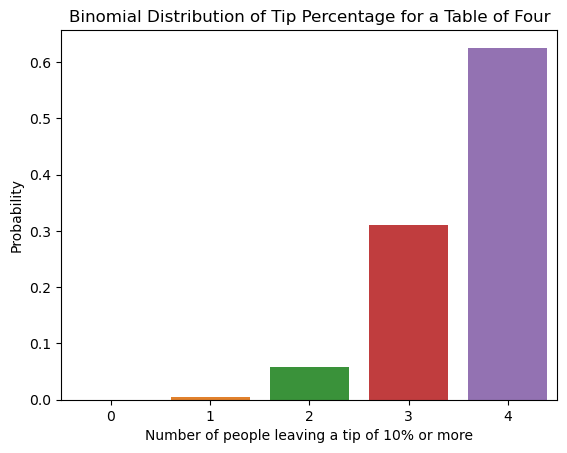

The probability of a table of four leaving 2 or more tips of 10% or more is: 0.9950300156356519


In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

tips = sns.load_dataset('tips')

# Calculate the proportion of tables that leave a tip of 10% or more
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_10plus'] = np.where(tips['tip_pct'] >= 0.1, 1, 0)
prop_10plus = tips['tip_10plus'].mean()

# Calculate the probability of a table of four leaving exactly 0, 1, 2, 3, or 4 tips of 20% or more
n = 4
k_values = np.arange(n+1)
probs = binom.pmf(k_values, n, prop_10plus)

# Plot the binomial distribution
sns.barplot(x=k_values, y=probs)
plt.xlabel('Number of people leaving a tip of 10% or more')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Tip Percentage for a Table of Four')
plt.show()

# Calculate the probability of a table of four leaving 2 or more tips of 10% or more
prob_2plus = binom.sf(1, n, prop_10plus)
print('The probability of a table of four leaving 2 or more tips of 10% or more is:', prob_2plus)

Here's an example of how we can use `scipy.stats` to calculate the probability of a table of four leaving a certain number of tips of `10%` or more, and to plot the binomial distribution for this scenario:

`20%`

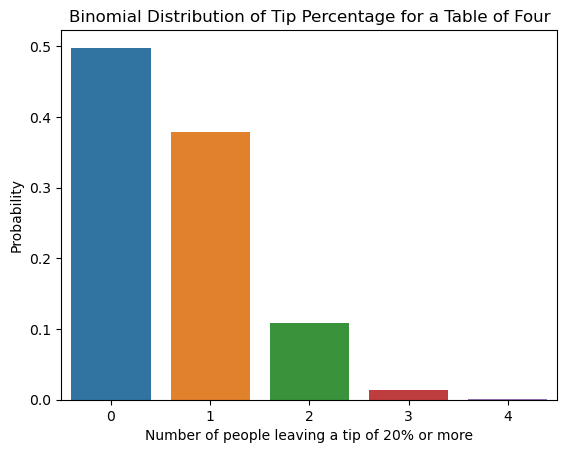

The probability of a table of four leaving 2 or more tips of 20% or more is: 0.1225760599676647


In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

tips = sns.load_dataset('tips')

# Calculate the proportion of tables that leave a tip of 20% or more
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_20plus'] = np.where(tips['tip_pct'] >= 0.2, 1, 0)
prop_20plus = tips['tip_20plus'].mean()

# Calculate the probability of a table of four leaving exactly 0, 1, 2, 3, or 4 tips of 20% or more
n = 4
k_values = np.arange(n+1)
probs = binom.pmf(k_values, n, prop_20plus)

# Plot the binomial distribution
sns.barplot(x=k_values, y=probs)
plt.xlabel('Number of people leaving a tip of 20% or more')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Tip Percentage for a Table of Four')
plt.show()

# Calculate the probability of a table of four leaving 2 or more tips of 20% or more
prob_2plus = binom.sf(1, n, prop_20plus)
print('The probability of a table of four leaving 2 or more tips of 20% or more is:', prob_2plus)


## **Wine Dataset**

Calculate the proportion of `Class=3` , `wines` with high alcohol content?

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv'
# Load the wine dataset using Pandas' read_csv function
wine = pd.read_csv(url)

wine

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


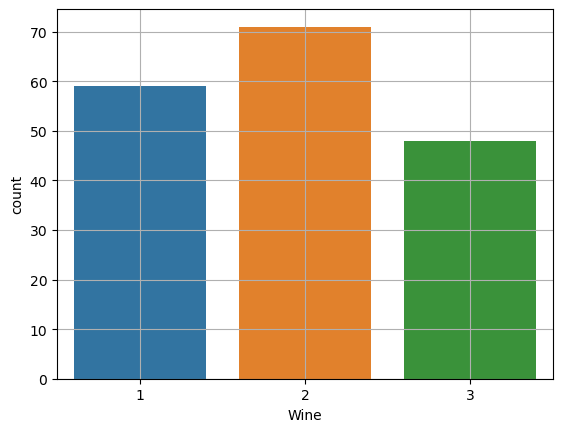

In [42]:
sns.countplot(x = wine['Wine'])
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

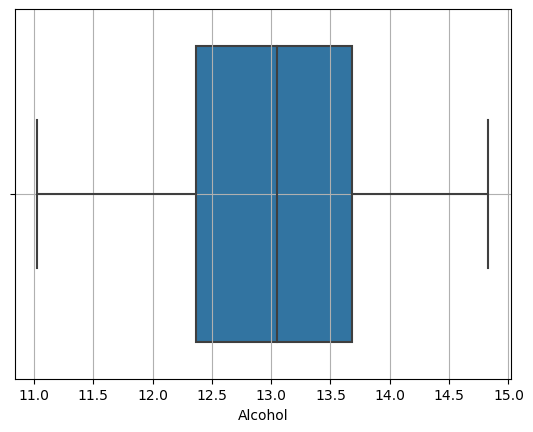

In [51]:
sns.boxplot(x=wine['Alcohol'])
plt.grid()
plt.show

In [52]:
# Filter the data for Class 3 wines
class3 = wine[wine['Wine'] == 3]

# Calculate the proportion of Class 3 wines with high alcohol content (above 14%)
high_alcohol = (class3['Alcohol'] > 14).mean()

In [54]:
# Create an array of possible number of successes (i.e. number of wines with high alcohol content) in 10 trials
n = 10
k_values = np.arange(n+1)

# Calculate the probability of each possible number of successes
probs = np.array([np.math.comb(n, k) * (high_alcohol ** k) *((1 - high_alcohol) ** (n - k)) for k in k_values])


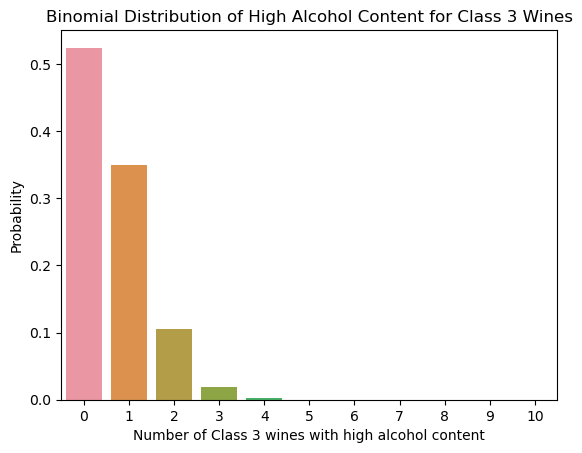

In [55]:
# Plot the binomial distribution
sns.barplot(x=k_values, y=probs)
plt.xlabel('Number of Class 3 wines with high alcohol content')
plt.ylabel('Probability')
plt.title('Binomial Distribution of High Alcohol Content for Class 3 Wines')
plt.show()

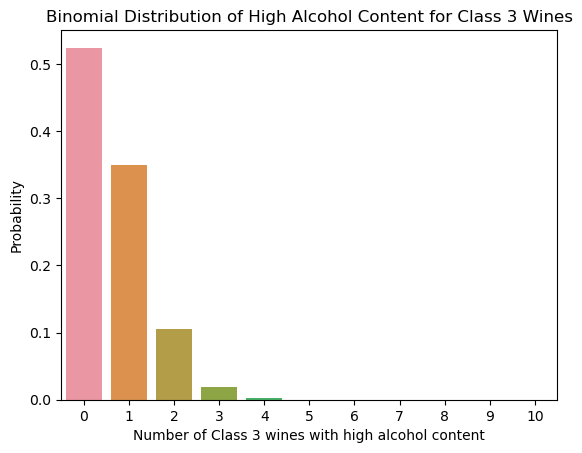

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv'
# Load the wine dataset using Pandas' read_csv function
wine = pd.read_csv(url)

# Filter the data for Class 3 wines
class3 = wine[wine['Wine'] == 3]

# Calculate the proportion of Class 3 wines with high alcohol content (above 14%)
high_alcohol = (class3['Alcohol'] > 14).mean()

# Create an array of possible number of successes (i.e. number of wines with high alcohol content) in 10 trials
n = 10
k_values = np.arange(n+1)

# Calculate the probability of each possible number of successes
probs = np.array([np.math.comb(n, k) * (high_alcohol ** k) *
                 ((1 - high_alcohol) ** (n - k)) for k in k_values])

# Plot the binomial distribution
sns.barplot(x=k_values, y=probs)
plt.xlabel('Number of Class 3 wines with high alcohol content')
plt.ylabel('Probability')
plt.title('Binomial Distribution of High Alcohol Content for Class 3 Wines')
plt.show()


We use the probability mass function (PMF) to describe the probability distribution of a discrete random variable. The PMF gives the probability of each possible value that the random variable can take, which allows us to calculate the probabilities of different events or outcomes.

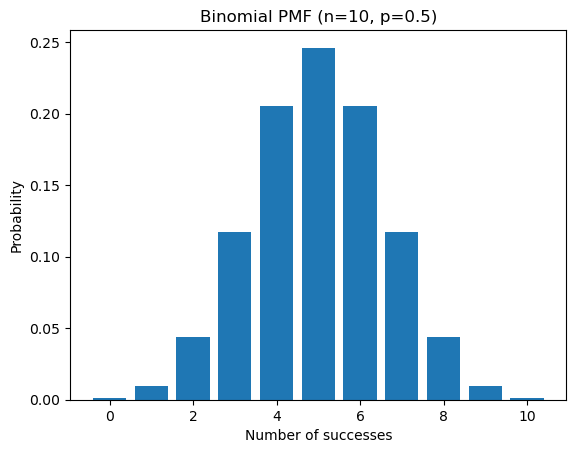

In [64]:
from scipy.stats import binom
import matplotlib.pyplot as plt

n = 10  # number of trials
p = 0.5  # probability of success
k_values = range(n+1)  # possible number of successes

# Calculate the binomial PMF for each value of k
pmf_values = [binom.pmf(k, n, p) for k in k_values]

# Plot the binomial PMF
plt.bar(k_values, pmf_values)
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.title(f'Binomial PMF (n={n}, p={p})')
plt.show()


## `scipy.stats.binom`

<p align='center'>
  <a href="#"><img src='https://chrispiech.github.io/probabilityForComputerScientists/img/chapters/binEquation2.png' width=35%></a>
</p>

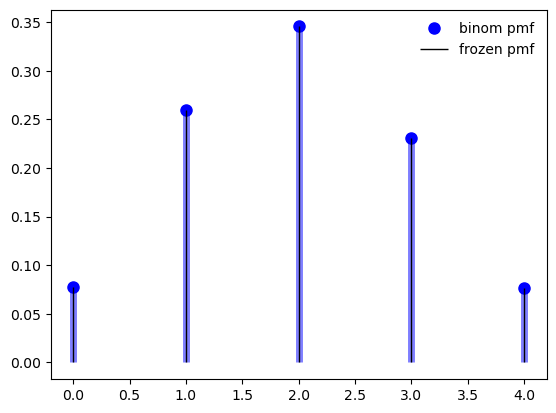

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

n, p = 5, 0.4

fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()


Methods                   | Description
-------------------------|---------------------------------------------------
`rvs(n, p, loc, size)`    | Random variates
`pmf(k, n, p, loc)`       | Probability mass function
`logpmf(k, n, p, loc)`    | Log of the probability mass function
`cdf(k, n, p, loc)`       | Cumulative distribution function
`logcdf(k, n, p, loc)`    | Log of the cumulative distribution function
`stats(n, p, loc, mom)`   | Mean, variance, skewness, and/or kurtosis
`entropy(n, p, loc)`      | (Differential) entropy of the RV
`median(n, p, loc)`       | Median of the RV
`mean(n, p, loc)`         | Mean of the RV
`var(n, p, loc)`          | Variance of the RV
`std(n, p, loc)`          | Standard deviation of the RV

